In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker

from scipy.io import loadmat

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


In [2]:
#loading datasets

salinas = loadmat("Salinas_corrected.mat")["salinas_corrected"]
groundtruth = loadmat("Salinas_gt.mat")["salinas_gt"]


In [3]:
#shape of the dataset

print("Salinas Shape:", salinas.shape)

print("Number of Bands:", salinas.shape[-1])

Salinas Shape: (512, 217, 204)
Number of Bands: 204


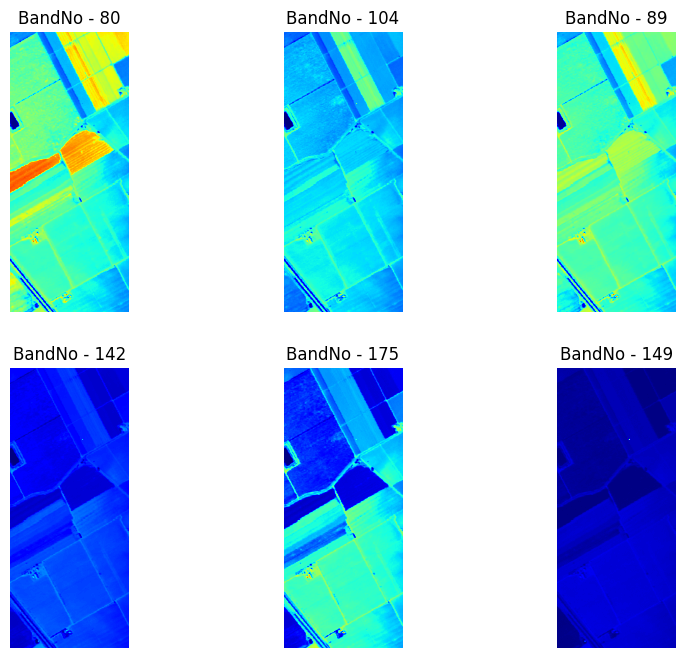

In [4]:
#plotting the bands

fig = plt.figure(figsize = (10, 8))
for i in range(1, 7):
    fig.add_subplot(2,3, i)
    q = np.random.randint(salinas.shape[2])
    plt.imshow(salinas[:,:,q], cmap = "jet")
    plt.axis("off")
    plt.title(f"BandNo - {q}")

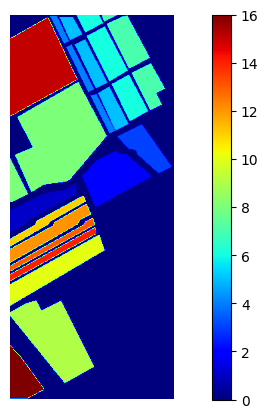

In [5]:
#visualizing of groundtruth
def plot_data(salinas):
    
    fig = plt.figure(figsize = (10, 5))
    plt.imshow(salinas, cmap = "jet")
    plt.colorbar()
    plt.axis("off")
    plt.show()

plot_data(groundtruth)

In [6]:
#reshape to the 2D array

X = salinas.reshape(-1, salinas.shape[-1])
y = groundtruth.ravel()

In [7]:
#removeing the background class (0) from the dataset

X = X[y != 0]
y = y[y != 0]

In [8]:
#split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
#normalize the dataset using min-max scaling

X_train_scaled = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test_scaled = (X_test - np.min(X_train)) / (np.max(X_train) - np.min(X_train))

In [10]:
X_train_scaled.shape, X_test_scaled.shape

((37890, 204), (16239, 204))

In [11]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [12]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(y_prediction, y_test)

In [14]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9476568754233635


In [15]:
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [16]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  1.0


In [17]:
#classification report
print(classification_report(y_test, y_prediction, target_names = ["Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow", "Fallow_rough_plow", "Fallow_smooth", "Stubble", "Celery", "Grapes_untrained", "Soil_vinyard_develop", "Corn_senesced_green_weeds", "Lettuce_romaine_4wk", "Lettuce_romaine_5wk", "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.99      0.99       598
    Brocoli_green_weeds_2       0.99      1.00      1.00      1126
                   Fallow       0.98      1.00      0.99       561
        Fallow_rough_plow       1.00      1.00      1.00       445
            Fallow_smooth       1.00      0.99      0.99       812
                  Stubble       1.00      1.00      1.00      1183
                   Celery       1.00      0.99      1.00      1080
         Grapes_untrained       0.86      0.92      0.89      3364
     Soil_vinyard_develop       1.00      1.00      1.00      1858
Corn_senesced_green_weeds       0.98      0.97      0.97      1002
      Lettuce_romaine_4wk       0.98      0.98      0.98       324
      Lettuce_romaine_5wk       0.98      1.00      0.99       570
      Lettuce_romaine_6wk       0.98      0.99      0.98       263
      Lettuce_romaine_7wk       0.98      0.97      0.97     

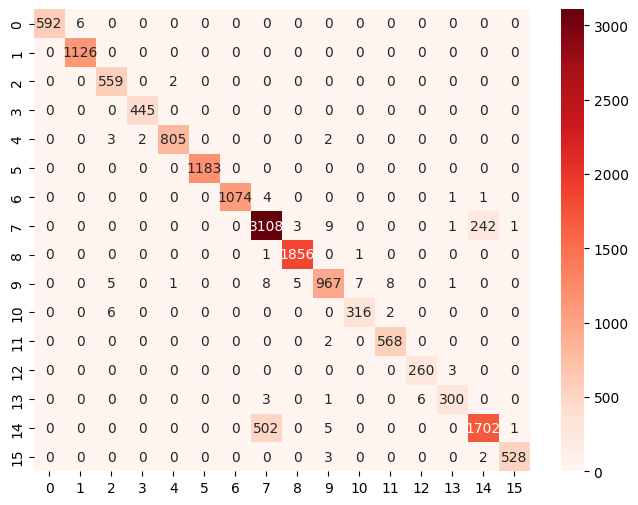

In [18]:
#confusion matrix

plt.figure(figsize = (8,6))

c_matrix = confusion_matrix(y_test, y_prediction)

sns.heatmap(c_matrix, annot = True, annot_kws = {"size": 10}, fmt = "d", cmap = "Reds")

plt.show()

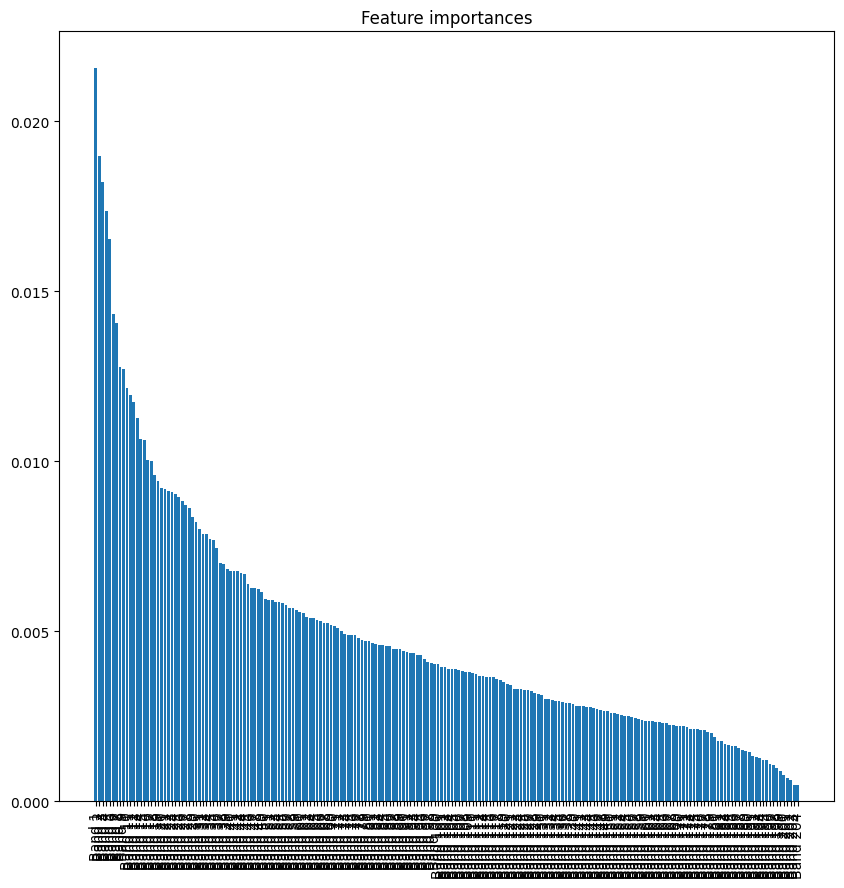

In [20]:
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
band_indices = [f"Band {i+1}" for i in range(X_train_scaled.shape[1])]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), band_indices, rotation=90)
plt.show()